<h1><center>Leaky Integrate and Fire Neuron Model</center></h1>

In [5]:
# imports
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt

## Predefined Functions

In [28]:
# Plotting Function for LIF Neuron Membrane Potential

def plot_mem(data, label):
    steps = len(data)
    plt.plot(range(steps), data)
    plt.xlabel('Time Step')
    plt.ylabel('Membrane Potential')
    plt.title(label)

## LIF Neuron Model
The model is based on the RC LIF structure of the neuron. The membrane potential $U(t)$ varies as follows:
<p>
<center> $U(t+\delta t) = U(t) + \frac{\delta t}{\tau} (-U(t)+RI_{in}(t))$ </center> <br>
Here, default value of $R = 50 M\Omega$ and $C = 100 pF$ in consistency with the actual biology

In [2]:
def leaky_integrate_neuron(U, time_step=1e-3, I=0, R=5e7, C=1e-10):
    tau = R*C
    U = U + (time_step/tau)*(-U + I*R)
    return U

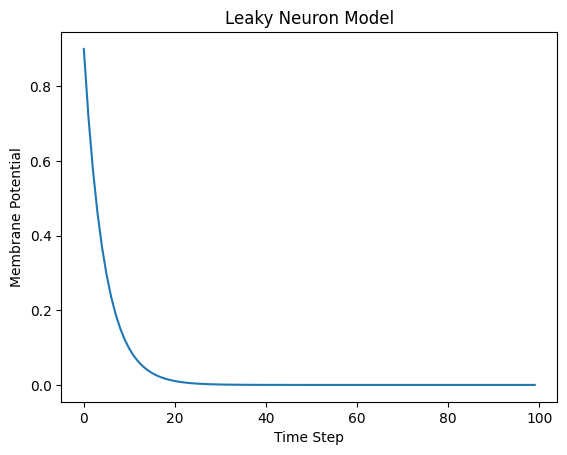

In [31]:
num_steps = 100
U = 0.9
U_trace = []  # keeps a record of U for plotting

for step in range(num_steps):
    U_trace.append(U)
    U = leaky_integrate_neuron(U)  # solve next step of U

plot_mem(U_trace, "Leaky Neuron Model")

## Lapicque's Leaky Integrate and Fire Model

In [51]:
# Model Initialization
time_step = 1e-3
R = 5
C = 1e-3

# leaky integrate and fire neuron, tau=5e-3
lif1 = snn.Lapicque(R=R, C=C, time_step=time_step)

In [111]:
# Initialize membrane, input, and output
mem = torch.tensor(1) * 0.9  # U=0.9 at t=0
cur_in = torch.zeros(num_steps)  # I=0 for all t
spk_out = torch.zeros(1)  # initialize output spikes

In [112]:
# A list to store a recording of membrane potential
mem_rec = [mem]

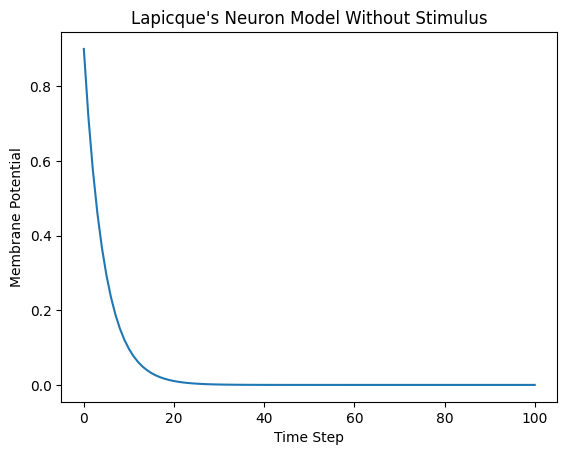

In [113]:
# pass updated value of mem and cur_in[step]=0 at every time step
for step in range(num_steps):
    spk_out, mem = lif1(cur_in[step], mem)

    # Store recordings of membrane potential
    mem_rec.append(mem)

# convert the list of tensors into one tensor
#mem_rec = torch.stack(mem_rec)

# pre-defined plotting function
plot_mem(mem_rec, "Lapicque's Neuron Model Without Stimulus")